## All Required Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

## Insurance Data

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,expenses
0,NaN,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50.0,male,31.0,3.0,no,northwest,10600.55
1334,18.0,female,31.9,0.0,no,northeast,2205.98
1335,18.0,female,36.9,0.0,no,southeast,1629.83
1336,21.0,female,25.8,0.0,no,southwest,2007.95


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,NaN,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50.0,male,31.0,3.0,no,northwest,10600.55
1334,18.0,female,31.9,0.0,no,northeast,2205.98
1335,18.0,female,36.9,0.0,no,southeast,1629.83
1336,21.0,female,25.8,0.0,no,southwest,2007.95
1337,61.0,female,29.1,0.0,yes,northwest,29141.36


In [7]:
df.sample(5)

,age,sex,bmi,children,smoker,region,expenses
1144,50.0,male,32.3,2.0,no,southwest,9630.40
160,42.0,female,26.6,0.0,yes,northwest,21348.71
280,40.0,female,28.1,1.0,yes,northeast,22331.57
930,26.0,male,46.5,1.0,no,southeast,2927.06
267,59.0,female,32.4,3.0,no,northeast,14590.63


## Basic Information About The Data (Data Preprocessing)

In [8]:
df.shape

(1338, 7)

In [9]:
# initial memory required by data is 73.3KB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1333 non-null   float64
 1   sex       1333 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1333 non-null   float64
 4   smoker    1333 non-null   object 
 5   region    1334 non-null   object 
 6   expenses  1334 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [10]:
# complete row is empty
df.isna().all(axis = 1).sum() 

np.int64(2)

In [11]:
df.isnull().sum()

age         5
sex         5
bmi         4
children    5
smoker      5
region      4
expenses    4
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(2)

In [13]:
# rows having atleast one missing values
df[df.isna().any(axis = 1)]

,age,sex,bmi,children,smoker,region,expenses
0,NaN,female,27.9,0.0,yes,southwest,16884.92
6,46.0,NaN,33.4,1.0,no,southeast,8240.59
19,30.0,male,35.3,NaN,yes,southwest,36837.47
92,59.0,male,29.8,3.0,yes,northeast,NaN
737,26.0,male,23.7,NaN,no,southwest,3484.33
775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,35.0,female,23.5,2.0,NaN,NaN,NaN
881,23.0,male,27.4,1.0,NaN,northwest,2789.06
893,47.0,NaN,38.9,2.0,yes,southeast,44202.65
914,33.0,male,24.6,NaN,no,northwest,5257.51


In [14]:
# these rows are duplicated of each others
df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,expenses
195,19.0,male,30.6,0.0,no,northwest,1639.56
581,19.0,male,30.6,0.0,no,northwest,1639.56
775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.describe()

,age,bmi,children,expenses
count,1333.000000,1334.000000,1333.000000,1.334000e+03
mean,39.564141,30.719565,1.095274,4.513014e+04
std,20.124869,6.635871,1.208982,1.159071e+06
min,0.000000,-3.000000,0.000000,1.121870e+03
25%,27.000000,26.300000,0.000000,4.740288e+03
50%,39.000000,30.400000,1.000000,9.382030e+03
75%,51.000000,34.775000,2.000000,1.663992e+04
max,564.000000,120.000000,5.000000,4.234440e+07


sex
male      673
female    660
Name: count, dtype: int64


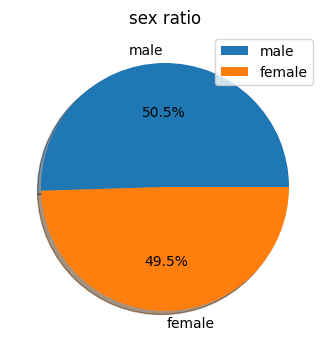

In [16]:
gender_category = df['sex'].value_counts()
print(gender_category)

plt.figure(figsize = (4,6))
plt.pie(gender_category, autopct = '%0.1f%%', shadow = True, labels = ['male', 'female'])
plt.title("sex ratio")
plt.legend()
plt.show()

smoker
no     1060
yes     273
Name: count, dtype: int64


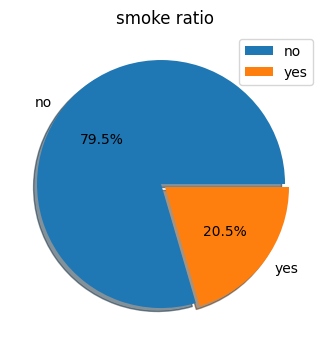

In [17]:
smoker_category = df['smoker'].value_counts()
print(smoker_category)

plt.figure(figsize = (4,6))
plt.pie(smoker_category, autopct = '%0.1f%%', shadow = True, labels = ['no', 'yes'], explode = [0.04, 0])
plt.title("smoke ratio")
plt.legend()
plt.show()

region
southeast    363
northwest    325
southwest    324
northeast    322
Name: count, dtype: int64


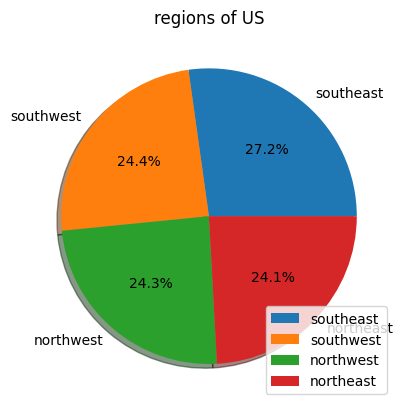

In [18]:
regions = df['region'].value_counts()
print(regions)

plt.pie(regions, autopct = '%0.1f%%', shadow = True, labels = ['southeast', 'southwest', 'northwest', 'northeast'])
plt.title("regions of US")
plt.legend()
plt.show()

children
0.0    572
1.0    324
2.0    238
3.0    155
4.0     25
5.0     19
Name: count, dtype: int64


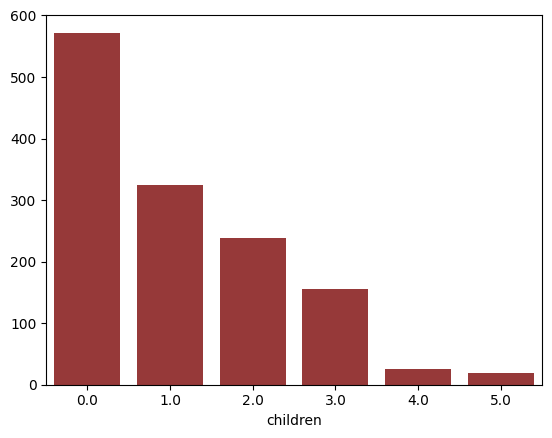

In [19]:
no_of_childrens = df['children'].value_counts()
print(no_of_childrens)


sns.barplot(x = no_of_childrens.index, y = no_of_childrens.values, color = 'brown')
plt.show()

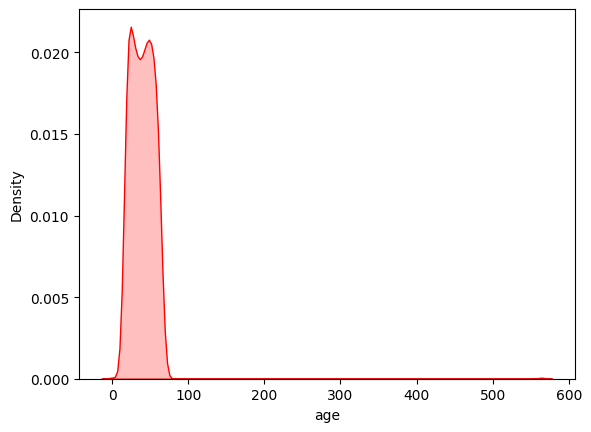

In [20]:
sns.kdeplot(data = df, x = "age", color = "red", fill = True)
plt.show()

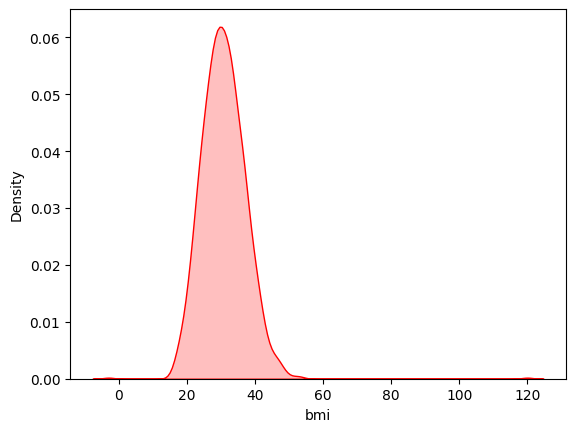

In [21]:
sns.kdeplot(data = df, x = "bmi", color = "red", fill = True)
plt.show()

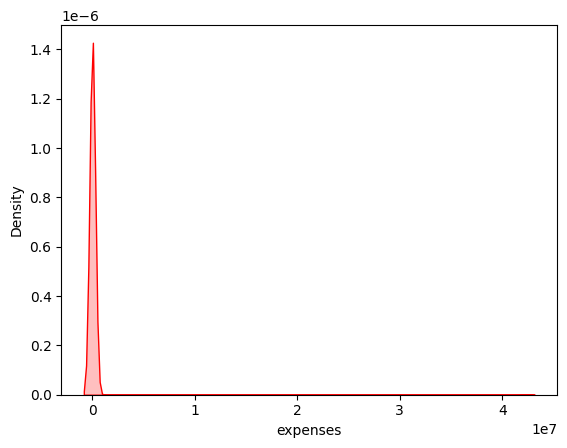

In [22]:
sns.kdeplot(data = df, x = "expenses", color = "red", fill = True)
plt.show()

In [23]:
# bmi is normally distributed
print("skewness of age :", df['age'].skew())
print("skewness of age :", df['bmi'].skew())
print("skewness of age :", df['expenses'].skew())

skewness of age : 13.293312614030175
skewness of age : 1.9342260267465141
skewness of age : 36.51653159542552


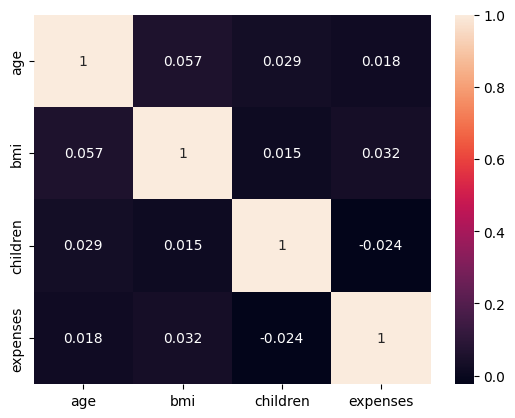

In [24]:
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

## Data Cleaning

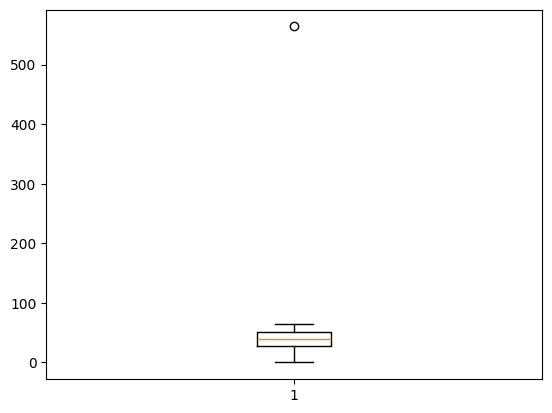

In [25]:
plt.boxplot(df[~df["age"].isnull()]['age'])
plt.show()

In [26]:
print(df['age'].nlargest(3))
print(df['age'].nsmallest(3))

980    564.0
62      64.0
94      64.0
Name: age, dtype: float64
916     0.0
1      18.0
22     18.0
Name: age, dtype: float64


In [27]:
df.loc[df["age"] > 100, 'age'] = df.drop(index = df.loc[df["age"] > 100].index)['expenses'].mode()
df.loc[df["age"] < 5, 'age'] = df.drop(index = df.loc[df["age"] < 5].index)['expenses'].mode()

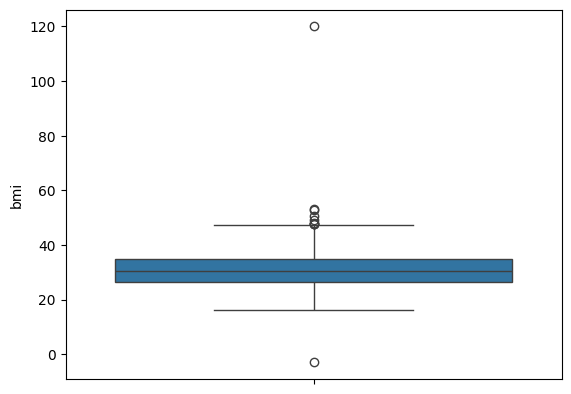

In [28]:
sns.boxplot(df['bmi'])
plt.show()

In [29]:
print(df["bmi"].nlargest(3))
print(df["bmi"].nsmallest(3))

361     120.0
1317     53.1
1047     52.6
Name: bmi, dtype: float64
1267    -3.0
172     16.0
428     16.8
Name: bmi, dtype: float64


In [30]:
df.loc[df["bmi"] > 80, 'bmi'] = df.drop(index = df.loc[df["bmi"] > 80].index)['bmi'].mean()
df.loc[df["bmi"] < 5, 'bmi'] = df.drop(index = df.loc[df["bmi"] < 5].index)['bmi'].mean()

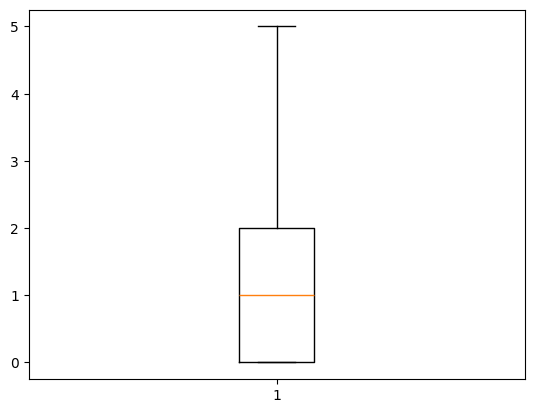

In [31]:
plt.boxplot(df[~df['children'].isnull()]['children'])
plt.show()

In [32]:
df

,age,sex,bmi,children,smoker,region,expenses
0,NaN,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50.0,male,31.0,3.0,no,northwest,10600.55
1334,18.0,female,31.9,0.0,no,northeast,2205.98
1335,18.0,female,36.9,0.0,no,southeast,1629.83
1336,21.0,female,25.8,0.0,no,southwest,2007.95


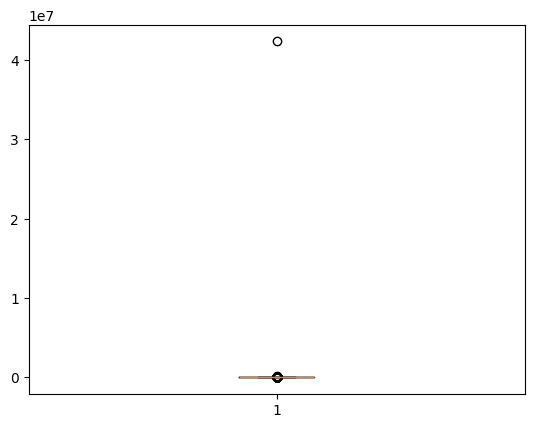

In [33]:
plt.boxplot(df[~df['expenses'].isnull()]['expenses'])
plt.show()

In [34]:
print(df["expenses"].nlargest(3))
print(df["expenses"].nsmallest(3))

706    42344400.41
519      233857.76
543       63770.43
Name: expenses, dtype: float64
940     1121.87
808     1131.51
1244    1135.94
Name: expenses, dtype: float64


In [35]:
df.loc[df["expenses"] > 200000, 'expenses'] = df[~(df["expenses"] > 200000)]['expenses'].mean()
df.loc[df["expenses"] < 100, 'expenses'] = df[~(df["expenses"] < 100)]['expenses'].mean()

In [36]:
df.dropna(how = "all", inplace = True)

In [37]:
df.drop_duplicates(keep = "first", inplace = True)

`missing value imputation`

In [38]:
# because bmi is normally distributed so missing values of bmi is replaced by its mean
df.fillna({'bmi' : df["bmi"].mean()}, inplace = True)

In [39]:
df.fillna({'age' : df["age"].mode()}, inplace = True)

In [40]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = "most_frequent")

df['sex'] = si.fit_transform(df[['sex']]).reshape(df.shape[0])
df['children'] = si.fit_transform(df[['children']]).reshape(df.shape[0])
df['smoker'] = si.fit_transform(df[['smoker']]).reshape(df.shape[0])
df['region'] = si.fit_transform(df[['region']]).reshape(df.shape[0])

In [41]:
df.isnull().sum()

age         4
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    2
dtype: int64

In [42]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)

In [43]:
loc = df.columns.get_loc('sex')
temp_df = pd.DataFrame(ohe.fit_transform(df[['sex']]), columns = ohe.categories_, index = df.index)
df.drop(columns = ['sex'], inplace = True)
df.insert(loc, 'female', temp_df['female'])
df.insert(loc+1, 'male', temp_df['male'])

In [44]:
loc = df.columns.get_loc('smoker')
temp_df = pd.DataFrame(ohe.fit_transform(df[['smoker']]), columns = ohe.categories_, index = df.index)
df.drop(columns = ['smoker'], inplace = True)
df.insert(loc, 'no_smoker', temp_df['no'])
df.insert(loc+1, 'is_smoker', temp_df['yes'])

In [45]:
loc = df.columns.get_loc('region')
temp_df = pd.DataFrame(ohe.fit_transform(df[['region']]), columns = ohe.categories_, index = df.index)
df.drop(columns = ['region'], inplace = True)
df.insert(loc, 'southeast', temp_df['southeast'])
df.insert(loc+1, 'southwest', temp_df['southwest'])
df.insert(loc+2, 'northwest', temp_df['northwest'])
df.insert(loc+3, 'northeast', temp_df['northeast'])

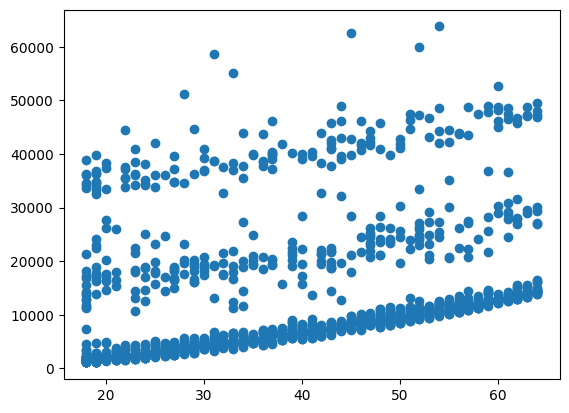

In [46]:
plt.scatter(df['age'], df['expenses'])
plt.show()

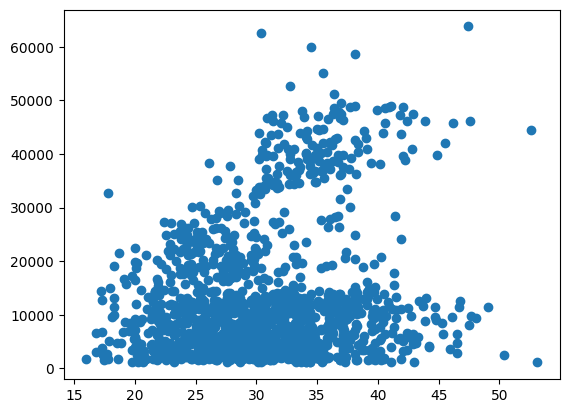

In [47]:
plt.scatter(df['bmi'], df['expenses'])
plt.show()

## Scaling and Store the data

In [48]:
df_unknown = df[df.isnull().any(axis = 1)]
df = df[~df.isnull().any(axis = 1)]

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = df.columns
df.loc[:, ['age', 'bmi', 'expenses']] = scaler.fit_transform(df[['age', 'bmi', 'expenses']])

In [50]:
df.to_csv('cleanedfinal.csv', index = False)
df_unknown.to_csv("fortesting.csv", index = False)